In [2]:
import pandas as pd

df = pd.read_excel('DS - Assignment Part 1 data set.xlsx')
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [4]:
df.isna().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

### First part of this notebook is EDA which shows us relation between different features.

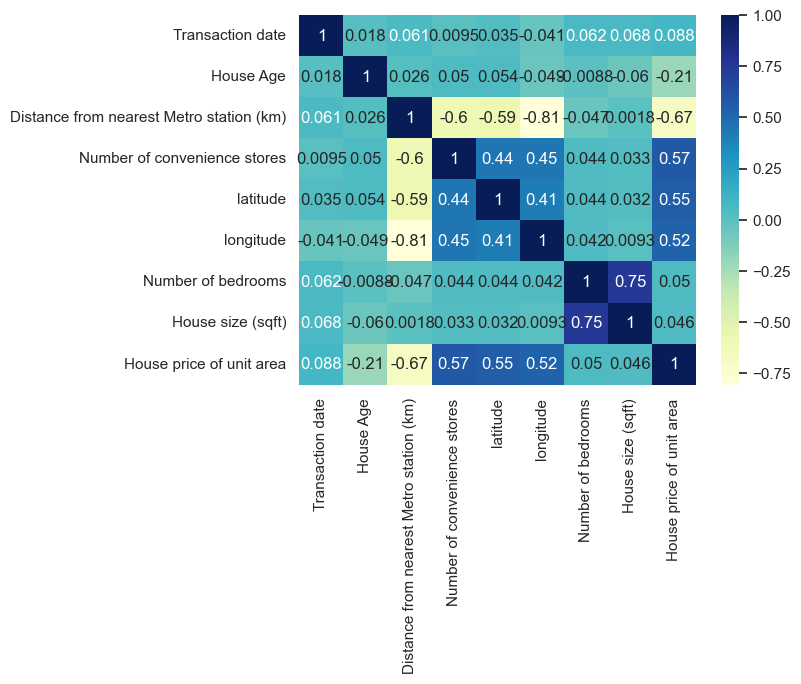

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

sns.heatmap(df.corr(), cmap="YlGnBu", annot=True);

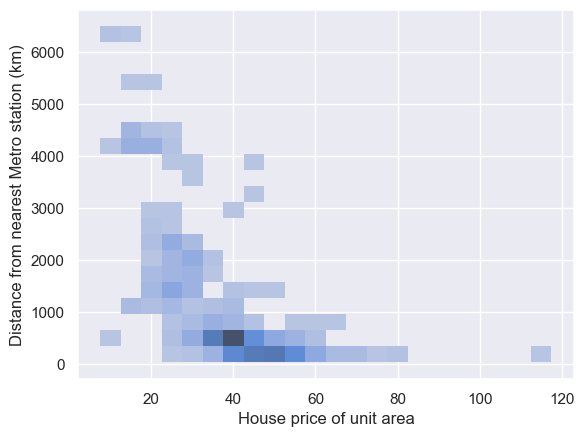

In [6]:
sns.histplot(x= 'House price of unit area', y= 'Distance from nearest Metro station (km)',data=df);

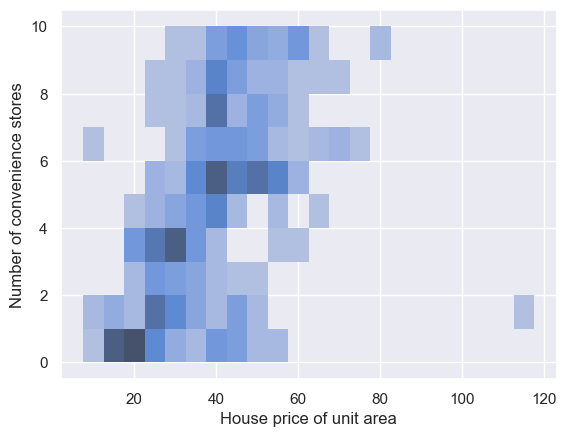

In [7]:
sns.histplot(x= 'House price of unit area', y= 'Number of convenience stores',data=df);

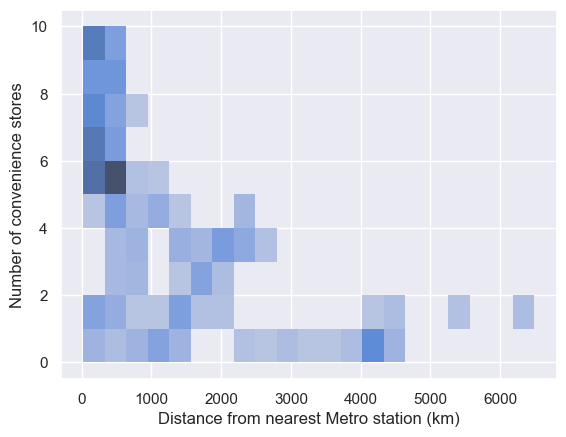

In [8]:
sns.histplot(x= 'Distance from nearest Metro station (km)', y= 'Number of convenience stores',data=df);

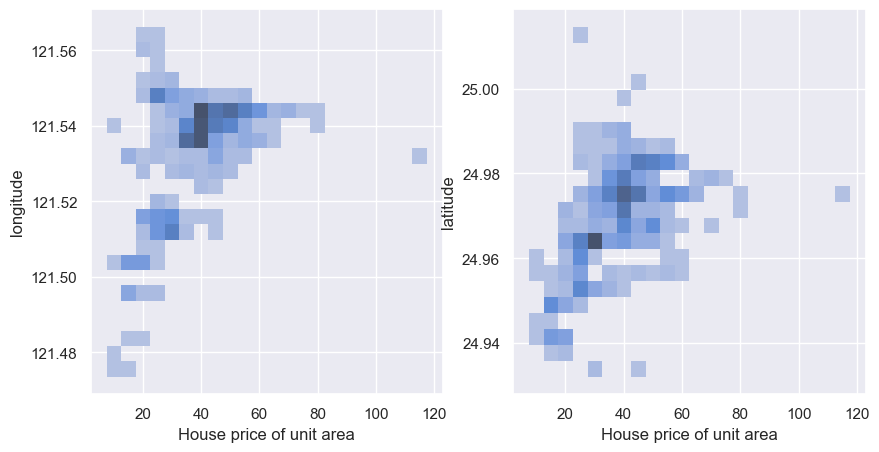

In [9]:
plt.rcParams["figure.figsize"] = [10.00, 5.00]
f, axes = plt.subplots(1, 2)
sns.histplot(x= 'House price of unit area', y= 'longitude',data=df,ax=axes[0])
sns.histplot(x= 'House price of unit area', y= 'latitude',data=df,ax=axes[1]);

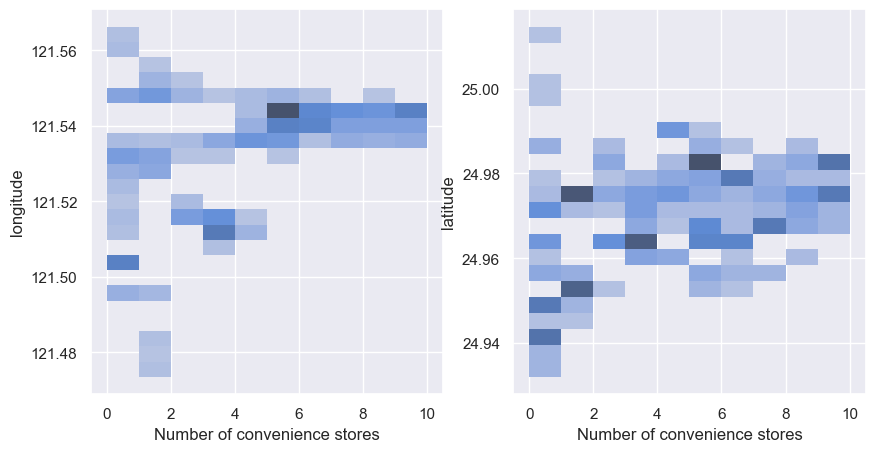

In [10]:
plt.rcParams["figure.figsize"] = [10.00, 5.00]
f, axes = plt.subplots(1, 2)
sns.histplot(x= 'Number of convenience stores', y= 'longitude',data=df,ax=axes[0])
sns.histplot(x= 'Number of convenience stores', y= 'latitude',data=df,ax=axes[1]);

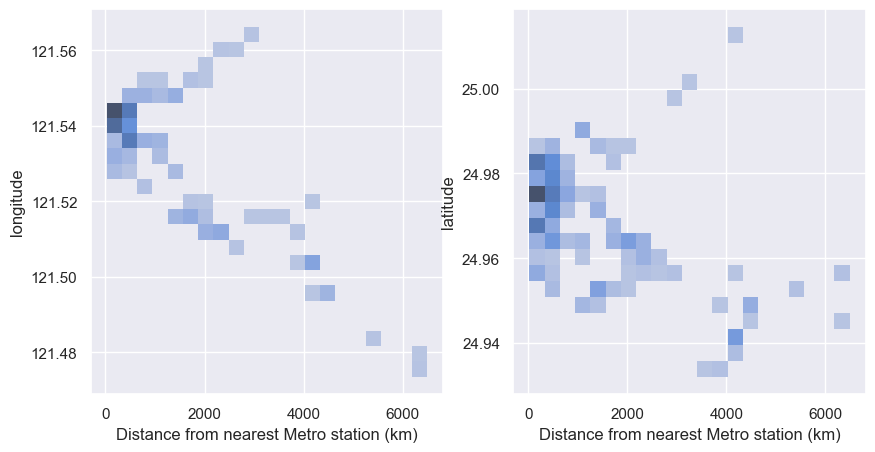

In [11]:
plt.rcParams["figure.figsize"] = [10.00, 5.00]
f, axes = plt.subplots(1, 2)
sns.histplot(x= 'Distance from nearest Metro station (km)', y= 'longitude',data=df,ax=axes[0])
sns.histplot(x= 'Distance from nearest Metro station (km)', y= 'latitude',data=df,ax=axes[1]);

#### Some points from EDA.
- Distance from nearest metro station is highly negativly corelated, means that higher the distance less the price.
- Lesser distance from metro station have high number of houses(as more number of longitutde and latitudes).
- More house are bui;d near places with higher number of stores and thus higher price of house per unit area.

### Second part of this notebook is model selection. 

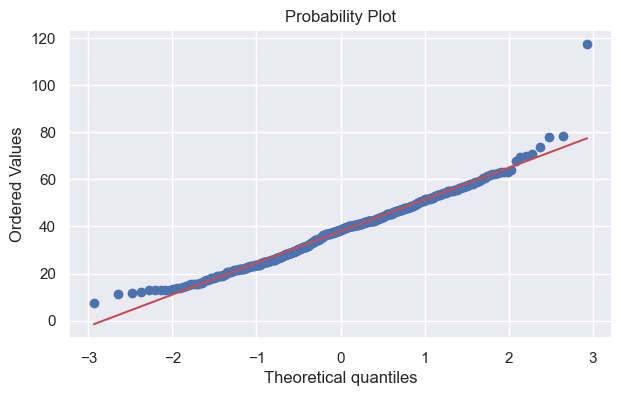

In [12]:
import scipy.stats as st
import pylab

plt.rcParams["figure.figsize"] = [7.00, 4.00]
st.probplot(df['House price of unit area'],dist = "norm",plot = pylab);

- This is repersentation that we have pretty normally distrbutied target value.

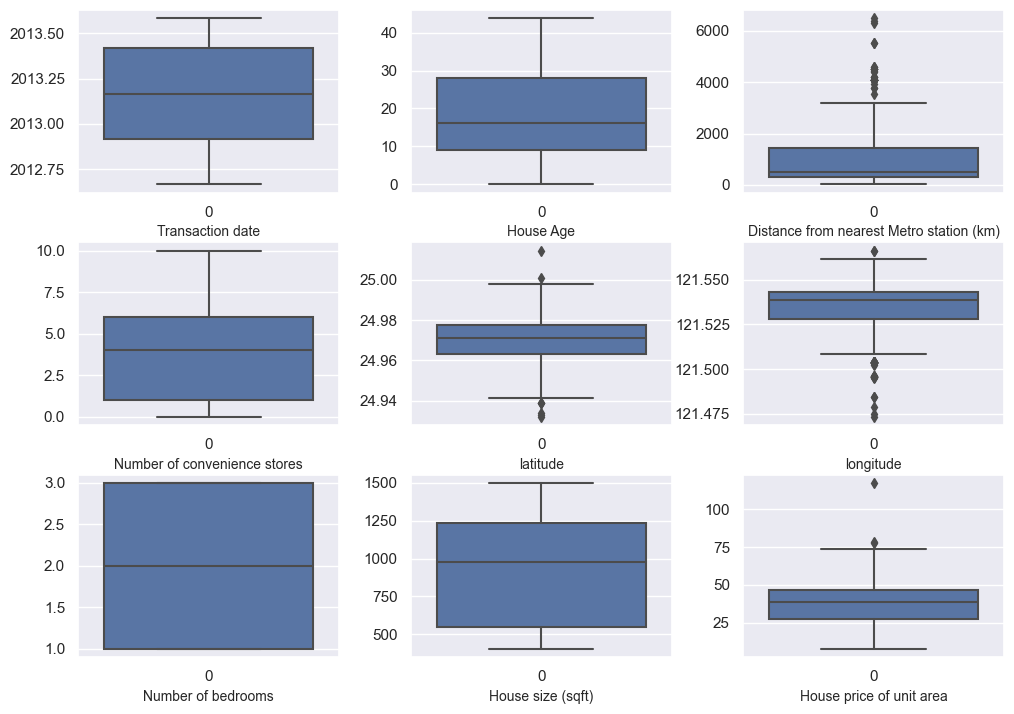

In [34]:
# let's see how data is distributed for every column
plt.figure(figsize=(10,7), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column]);
        plt.xlabel(column,fontsize=10)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout();

- These graph shows that we have some outliers in some for the features, so I used RobustScaler to counter that problem.

In [14]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X = df.drop(columns= 'House price of unit area')
y = df['House price of unit area']

X = scaler.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 355)

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

model = RandomForestRegressor()
model.fit(X_train,y_train)

predictions = model.predict(X_train)
score = mean_absolute_percentage_error(y_train,predictions)
score

0.05259395082891171

In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_absolute_percentage_error", cv = 10)
scores.mean()

-0.13830043649676083

In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {'bootstrap': [True],'max_depth': [80, 90, 100, 110],'max_features': [3,4],'min_samples_leaf': [3,4,5],
    'min_samples_split': [4,6,8],'n_estimators': [1000,1200,1400,1600]}
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 1000}

In [19]:
rfmodel = grid_search.best_estimator_
predictions = rfmodel.predict(X_train)
rf_score = mean_absolute_percentage_error(y_train,predictions)
rf_score

0.0851827430022908

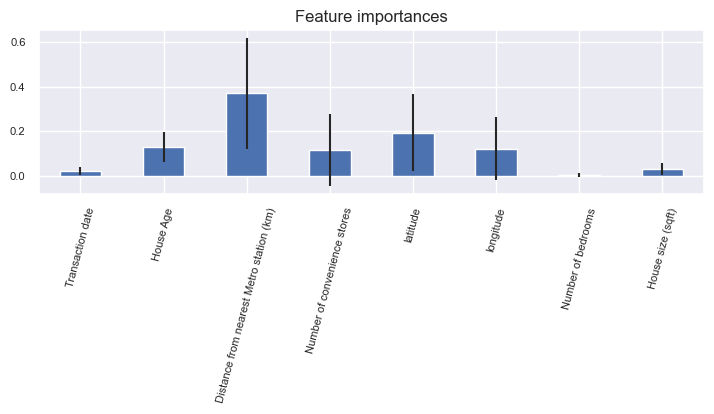

In [31]:
import numpy as np

X = df.drop(columns= 'House price of unit area')
feature_names = X.columns
importances = rfmodel.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfmodel.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

font = {'size': 2}
plt.rc('font', **font)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, fontsize=8)
ax.set_title("Feature importances")
plt.xticks(rotation=75)
fig.tight_layout()

- This is a repersentation of Feature importance in model training.

In [20]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(random_state=1, max_iter=10000)
model.fit(X_train,y_train)

predictions = model.predict(X_train)
score = mean_absolute_percentage_error(y_train,predictions)
score

0.07643265633238121

In [22]:
scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_absolute_percentage_error", cv = 10)
scores.mean()

-0.16289772821293053

In [32]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'activation': ['relu','tanh','logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'batch_size': [16,32,62]
}
grid = GridSearchCV(model, param_grid, n_jobs= -1, cv=3)
grid.fit(X_train, y_train)
grid.best_params_

{'activation': 'logistic',
 'alpha': 0.05,
 'batch_size': 16,
 'hidden_layer_sizes': (150, 100, 50),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [33]:
mlpmodel = grid.best_estimator_
predictions = mlpmodel.predict(X_train)
mlp_score = mean_absolute_percentage_error(y_train,predictions)
mlp_score

0.1382444679193386

#### These are 2 best models for this dataset.
- First I used many different models and shortlisted these two.
- Than applied cross validation to check for overfitting.
- Than hyper parameter tuning of these models.

In [37]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
mlp_predictions = mlpmodel.predict(X_test)
rf_predictions = rfmodel.predict(X_test)
comparison = pd.DataFrame({'Metrics':['MSE','RMSE','MAE','MAPE'],
"MLP":[mean_squared_error(y_test,mlp_predictions),mean_squared_error(y_test,mlp_predictions,squared=False),mean_absolute_error(y_test,mlp_predictions),mean_absolute_percentage_error(y_test,mlp_predictions)],
"Random Forest":[mean_squared_error(y_test,rf_predictions),mean_squared_error(y_test,rf_predictions,squared=False),mean_absolute_error(y_test,rf_predictions),mean_absolute_percentage_error(y_test,rf_predictions)]})

comparison

,Metrics,MLP,Random Forest
0,MSE,82.056399,58.636334
1,RMSE,9.058499,7.657437
2,MAE,6.627810,5.285531
3,MAPE,0.172410,0.138062


#### For this comparison I chose 2 models with highest MAPE, Multi Layer Preceptron and Random Forest.
